In [0]:
spark

In [0]:
from pyspark.sql.types import StructField, StructType, IntegerType, StringType, BooleanType, DateType, DoubleType, DecimalType 
from pyspark.sql.functions import col, when, sum, avg, row_number,lit,countDistinct,count
from pyspark.sql.window import Window
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession 

# Initialize the schema with the static fields
trucks_schema = StructType([
    StructField("driverid", StringType(), True),
    StructField("truckid", StringType(), True),
    StructField("model", StringType(), True)
])

# Add fields dynamically for each month's mileage and gas
# The months list includes every month from the data as observed in the sample
months = [
    "jun13", "may13", "apr13", "mar13", "feb13", "jan13",
    "dec12", "nov12", "oct12", "sep12", "aug12", "jul12", "jun12", "may12", "apr12", "mar12", "feb12", "jan12",
    "dec11", "nov11", "oct11", "sep11", "aug11", "jul11", "jun11", "may11", "apr11", "mar11", "feb11", "jan11",
    "dec10", "nov10", "oct10", "sep10", "aug10", "jul10", "jun10", "may10", "apr10", "mar10", "feb10", "jan10",
    "dec09", "nov09", "oct09", "sep09", "aug09", "jul09", "jun09", "may09", "apr09", "mar09", "feb09", "jan09"
]

# Iterate through each month and add two fields: one for miles and one for gas
for month in months:
    trucks_schema.add(StructField(f"{month}_miles", IntegerType(), True))
    trucks_schema.add(StructField(f"{month}_gas", IntegerType(), True))


trucks_df = spark.read.schema(trucks_schema).format("csv").option("header","true").load("s3://trucks-data/trucks.csv")  
trucks_df.show(5)
display(trucks_df)

+--------+-------+------------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-----------+---------+-

driverid,truckid,model,jun13_miles,jun13_gas,may13_miles,may13_gas,apr13_miles,apr13_gas,mar13_miles,mar13_gas,feb13_miles,feb13_gas,jan13_miles,jan13_gas,dec12_miles,dec12_gas,nov12_miles,nov12_gas,oct12_miles,oct12_gas,sep12_miles,sep12_gas,aug12_miles,aug12_gas,jul12_miles,jul12_gas,jun12_miles,jun12_gas,may12_miles,may12_gas,apr12_miles,apr12_gas,mar12_miles,mar12_gas,feb12_miles,feb12_gas,jan12_miles,jan12_gas,dec11_miles,dec11_gas,nov11_miles,nov11_gas,oct11_miles,oct11_gas,sep11_miles,sep11_gas,aug11_miles,aug11_gas,jul11_miles,jul11_gas,jun11_miles,jun11_gas,may11_miles,may11_gas,apr11_miles,apr11_gas,mar11_miles,mar11_gas,feb11_miles,feb11_gas,jan11_miles,jan11_gas,dec10_miles,dec10_gas,nov10_miles,nov10_gas,oct10_miles,oct10_gas,sep10_miles,sep10_gas,aug10_miles,aug10_gas,jul10_miles,jul10_gas,jun10_miles,jun10_gas,may10_miles,may10_gas,apr10_miles,apr10_gas,mar10_miles,mar10_gas,feb10_miles,feb10_gas,jan10_miles,jan10_gas,dec09_miles,dec09_gas,nov09_miles,nov09_gas,oct09_miles,oct09_gas,sep09_miles,sep09_gas,aug09_miles,aug09_gas,jul09_miles,jul09_gas,jun09_miles,jun09_gas,may09_miles,may09_gas,apr09_miles,apr09_gas,mar09_miles,mar09_gas,feb09_miles,feb09_gas,jan09_miles,jan09_gas
A1,A1,Freightliner,9217,1914,8769,1892,14234,3008,11519,2262,8676,1596,10025,1878,12647,2331,10214,2054,10807,2134,11127,2191,9754,1967,12925,2578,15792,3313,9052,1878,11062,2150,13594,2824,11019,2324,9222,1902,8565,1745,10410,1943,13450,3047,10446,2112,10378,2201,9014,1598,9466,2642,14175,2642,11573,2642,13055,2642,14614,2642,14099,2642,15174,2642,10635,2642,12105,2642,10130,2642,11344,2642,10622,2642,10747,2642,12976,2642,13221,2642,10435,2642,12839,2642,8969,2642,8795,2642,13668,2642,12414,2642,13300,2642,11698,2642,14207,2642,14062,2642,12073,2642,15276,2642,9880,2642,13861,2642,11176,2642
A2,A2,Ford,12058,2335,14314,2648,11050,2323,14114,3157,13583,2346,15362,3353,13608,2607,11236,2597,11380,1939,12934,2324,11848,2301,13206,3114,15316,3344,13838,2718,12024,2800,12693,2329,14392,2929,11134,2290,13911,2953,11542,2650,11296,2135,10224,2027,14595,3013,13769,2980,10377,1827,12786,1827,14364,1827,8978,1827,9259,1827,9545,1827,13100,1827,8529,1827,9667,1827,13264,1827,12070,1827,10367,1827,13829,1827,10942,1827,10463,1827,9406,1827,14755,1827,14043,1827,11656,1827,14744,1827,13797,1827,9660,1827,10283,1827,12034,1827,11719,1827,13912,1827,11892,1827,15158,1827,12774,1827,11743,1827
A3,A3,Ford,13652,2899,12075,2603,12277,2792,9642,1864,8606,1796,13089,2796,10762,2099,10250,1857,9312,2046,8437,1728,13905,2789,14079,2965,12761,2708,13264,2754,12957,2529,12598,2581,13291,2644,9433,1881,13980,2503,8592,1909,11978,2572,10921,2299,13774,2956,9451,1940,13420,3064,11378,3064,13573,3064,11635,3064,9577,3064,10780,3064,12490,3064,15127,3064,11524,3064,14234,3064,14551,3064,12213,3064,14079,3064,11040,3064,10460,3064,15435,3064,12811,3064,12616,3064,10743,3064,11732,3064,9429,3064,9025,3064,9547,3064,11267,3064,11205,3064,9821,3064,15224,3064,11209,3064,14203,3064,10150,3064
A4,A4,Kenworth,12687,2439,10680,2083,11071,2599,12302,2361,8845,1816,14130,2929,12316,2702,11999,2377,14679,3455,13835,3232,13385,2966,11443,2582,9290,2092,11702,2129,15261,3560,11947,2155,9782,2048,11507,2639,12157,2582,10861,2021,13122,2981,11069,1971,12312,2363,10386,1897,8714,2965,10235,2965,10090,2965,14085,2965,14434,2965,14256,2965,9737,2965,13118,2965,9862,2965,13570,2965,14179,2965,13989,2965,12950,2965,11157,2965,8673,2965,15177,2965,9579,2965,14282,2965,14325,2965,12724,2965,12773,2965,8998,2965,11910,2965,12707,2965,13465,2965,14419,2965,14684,2965,13090,2965,15090,2965,14249,2965
A5,A5,Hino,10233,1825,14634,3450,9281,2028,13547,2790,12990,3056,13769,2713,11423,2083,12570,2547,14204,2770,15279,3122,14473,2745,11312,2453,13969,2943,13422,2520,14092,2619,10749,2289,10649,2410,12587,2269,8498,1736,15339,2612,10502,2099,13867,3133,11594,2613,10571,2044,13508,2310,15678,2310,14318,2310,14088,2310,13217,2310,12969,2310,14377,2310,11064,2310,12704,2310,10887,2310,13956,2310,144

In [0]:
# creates the geolocationschema
geolocation_schema = StructType([
    StructField("truckid", StringType(), True),
    StructField("driverid", StringType(), True),
    StructField("event", StringType(), True),
    StructField("latitude", DoubleType(), True),
    StructField("longitude", DoubleType(), True),
    StructField("city", StringType(), True),
    StructField("state", StringType(), True),
    StructField("velocity", IntegerType(), True),
    StructField("event_ind", IntegerType(), True),
    StructField("idling_ind", IntegerType(), True)
])

#   Loading the data from the amazon S3 bucket
geolocation_df = spark.read.schema(geolocation_schema).format("csv").option("header","true").load("s3://trucks-data/geolocation.csv")    

# Shows 5 rows of the geolocation table
geolocation_df.show(5)

display(trucks_df)

+-------+--------+---------+---------+-----------+----------+----------+--------+---------+----------+
|truckid|driverid|    event| latitude|  longitude|      city|     state|velocity|event_ind|idling_ind|
+-------+--------+---------+---------+-----------+----------+----------+--------+---------+----------+
|    A54|     A54|   normal|38.440467|-122.714431|Santa Rosa|California|      17|        0|         0|
|    A20|     A20|   normal|36.977173|-121.899402|     Aptos|California|      27|        0|         0|
|    A40|     A40|overspeed|37.957702| -121.29078|  Stockton|California|      77|        1|         0|
|    A31|     A31|   normal|39.409608|-123.355566|   Willits|California|      22|        0|         0|
|    A71|     A71|   normal|33.683947|-117.794694|    Irvine|California|      43|        0|         0|
+-------+--------+---------+---------+-----------+----------+----------+--------+---------+----------+
only showing top 5 rows



driverid,truckid,model,jun13_miles,jun13_gas,may13_miles,may13_gas,apr13_miles,apr13_gas,mar13_miles,mar13_gas,feb13_miles,feb13_gas,jan13_miles,jan13_gas,dec12_miles,dec12_gas,nov12_miles,nov12_gas,oct12_miles,oct12_gas,sep12_miles,sep12_gas,aug12_miles,aug12_gas,jul12_miles,jul12_gas,jun12_miles,jun12_gas,may12_miles,may12_gas,apr12_miles,apr12_gas,mar12_miles,mar12_gas,feb12_miles,feb12_gas,jan12_miles,jan12_gas,dec11_miles,dec11_gas,nov11_miles,nov11_gas,oct11_miles,oct11_gas,sep11_miles,sep11_gas,aug11_miles,aug11_gas,jul11_miles,jul11_gas,jun11_miles,jun11_gas,may11_miles,may11_gas,apr11_miles,apr11_gas,mar11_miles,mar11_gas,feb11_miles,feb11_gas,jan11_miles,jan11_gas,dec10_miles,dec10_gas,nov10_miles,nov10_gas,oct10_miles,oct10_gas,sep10_miles,sep10_gas,aug10_miles,aug10_gas,jul10_miles,jul10_gas,jun10_miles,jun10_gas,may10_miles,may10_gas,apr10_miles,apr10_gas,mar10_miles,mar10_gas,feb10_miles,feb10_gas,jan10_miles,jan10_gas,dec09_miles,dec09_gas,nov09_miles,nov09_gas,oct09_miles,oct09_gas,sep09_miles,sep09_gas,aug09_miles,aug09_gas,jul09_miles,jul09_gas,jun09_miles,jun09_gas,may09_miles,may09_gas,apr09_miles,apr09_gas,mar09_miles,mar09_gas,feb09_miles,feb09_gas,jan09_miles,jan09_gas
A1,A1,Freightliner,9217,1914,8769,1892,14234,3008,11519,2262,8676,1596,10025,1878,12647,2331,10214,2054,10807,2134,11127,2191,9754,1967,12925,2578,15792,3313,9052,1878,11062,2150,13594,2824,11019,2324,9222,1902,8565,1745,10410,1943,13450,3047,10446,2112,10378,2201,9014,1598,9466,2642,14175,2642,11573,2642,13055,2642,14614,2642,14099,2642,15174,2642,10635,2642,12105,2642,10130,2642,11344,2642,10622,2642,10747,2642,12976,2642,13221,2642,10435,2642,12839,2642,8969,2642,8795,2642,13668,2642,12414,2642,13300,2642,11698,2642,14207,2642,14062,2642,12073,2642,15276,2642,9880,2642,13861,2642,11176,2642
A2,A2,Ford,12058,2335,14314,2648,11050,2323,14114,3157,13583,2346,15362,3353,13608,2607,11236,2597,11380,1939,12934,2324,11848,2301,13206,3114,15316,3344,13838,2718,12024,2800,12693,2329,14392,2929,11134,2290,13911,2953,11542,2650,11296,2135,10224,2027,14595,3013,13769,2980,10377,1827,12786,1827,14364,1827,8978,1827,9259,1827,9545,1827,13100,1827,8529,1827,9667,1827,13264,1827,12070,1827,10367,1827,13829,1827,10942,1827,10463,1827,9406,1827,14755,1827,14043,1827,11656,1827,14744,1827,13797,1827,9660,1827,10283,1827,12034,1827,11719,1827,13912,1827,11892,1827,15158,1827,12774,1827,11743,1827
A3,A3,Ford,13652,2899,12075,2603,12277,2792,9642,1864,8606,1796,13089,2796,10762,2099,10250,1857,9312,2046,8437,1728,13905,2789,14079,2965,12761,2708,13264,2754,12957,2529,12598,2581,13291,2644,9433,1881,13980,2503,8592,1909,11978,2572,10921,2299,13774,2956,9451,1940,13420,3064,11378,3064,13573,3064,11635,3064,9577,3064,10780,3064,12490,3064,15127,3064,11524,3064,14234,3064,14551,3064,12213,3064,14079,3064,11040,3064,10460,3064,15435,3064,12811,3064,12616,3064,10743,3064,11732,3064,9429,3064,9025,3064,9547,3064,11267,3064,11205,3064,9821,3064,15224,3064,11209,3064,14203,3064,10150,3064
A4,A4,Kenworth,12687,2439,10680,2083,11071,2599,12302,2361,8845,1816,14130,2929,12316,2702,11999,2377,14679,3455,13835,3232,13385,2966,11443,2582,9290,2092,11702,2129,15261,3560,11947,2155,9782,2048,11507,2639,12157,2582,10861,2021,13122,2981,11069,1971,12312,2363,10386,1897,8714,2965,10235,2965,10090,2965,14085,2965,14434,2965,14256,2965,9737,2965,13118,2965,9862,2965,13570,2965,14179,2965,13989,2965,12950,2965,11157,2965,8673,2965,15177,2965,9579,2965,14282,2965,14325,2965,12724,2965,12773,2965,8998,2965,11910,2965,12707,2965,13465,2965,14419,2965,14684,2965,13090,2965,15090,2965,14249,2965
A5,A5,Hino,10233,1825,14634,3450,9281,2028,13547,2790,12990,3056,13769,2713,11423,2083,12570,2547,14204,2770,15279,3122,14473,2745,11312,2453,13969,2943,13422,2520,14092,2619,10749,2289,10649,2410,12587,2269,8498,1736,15339,2612,10502,2099,13867,3133,11594,2613,10571,2044,13508,2310,15678,2310,14318,2310,14088,2310,13217,2310,12969,2310,14377,2310,11064,2310,12704,2310,10887,2310,13956,2310,144

driverid,total_miles,total_gas
A18,656474,108294
A79,655093,108853
A61,644254,108517
A30,647312,109561
A60,653030,112248
A38,650497,112862
A13,654319,114841
A35,637069,112177
A51,622764,109715
A62,626253,110377


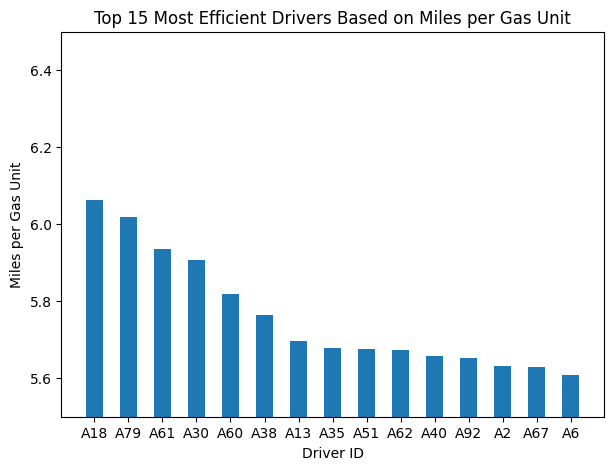

In [0]:
geolocation_df.createOrReplaceTempView("geolocation")
trucks_df.createOrReplaceTempView("trucks")

efficient_drivers_query = """
SELECT driverid, 
       SUM(jun13_miles + may13_miles + apr13_miles + mar13_miles + feb13_miles + jan13_miles +
           dec12_miles + nov12_miles + oct12_miles + sep12_miles + aug12_miles + jul12_miles +
           jun12_miles + may12_miles + apr12_miles + mar12_miles + feb12_miles + jan12_miles +
           dec11_miles + nov11_miles + oct11_miles + sep11_miles + aug11_miles + jul11_miles +
           jun11_miles + may11_miles + apr11_miles + mar11_miles + feb11_miles + jan11_miles +
           dec10_miles + nov10_miles + oct10_miles + sep10_miles + aug10_miles + jul10_miles +
           jun10_miles + may10_miles + apr10_miles + mar10_miles + feb10_miles + jan10_miles +
           dec09_miles + nov09_miles + oct09_miles + sep09_miles + aug09_miles + jul09_miles +
           jun09_miles + may09_miles + apr09_miles + mar09_miles + feb09_miles + jan09_miles) AS total_miles,
       SUM(jun13_gas + may13_gas + apr13_gas + mar13_gas + feb13_gas + jan13_gas +
           dec12_gas + nov12_gas + oct12_gas + sep12_gas + aug12_gas + jul12_gas +
           jun12_gas + may12_gas + apr12_gas + mar12_gas + feb12_gas + jan12_gas +
           dec11_gas + nov11_gas + oct11_gas + sep11_gas + aug11_gas + jul11_gas +
           jun11_gas + may11_gas + apr11_gas + mar11_gas + feb11_gas + jan11_gas +
           dec10_gas + nov10_gas + oct10_gas + sep10_gas + aug10_gas + jul10_gas +
           jun10_gas + may10_gas + apr10_gas + mar10_gas + feb10_gas + jan10_gas +
           dec09_gas + nov09_gas + oct09_gas + sep09_gas + aug09_gas + jul09_gas +
           jun09_gas + may09_gas + apr09_gas + mar09_gas + feb09_gas + jan09_gas) AS total_gas
FROM trucks
GROUP BY driverid
ORDER BY total_miles / total_gas DESC
LIMIT 15
"""

efficient_drivers = spark.sql(efficient_drivers_query)
display(efficient_drivers)

# Plotting the results
efficient_drivers_pd = efficient_drivers.toPandas()
plt.figure(figsize=(7, 5))
plt.bar(efficient_drivers_pd['driverid'], efficient_drivers_pd['total_miles'] / efficient_drivers_pd['total_gas'], width=0.5)
plt.xlabel('Driver ID')
plt.ylabel('Miles per Gas Unit')
plt.title('Top 15 Most Efficient Drivers Based on Miles per Gas Unit')
plt.ylim(5.50,6.50)
plt.show()



driverid,count
A97,14
A73,10
A35,9
A50,9
A5,9
A95,8
A71,8
A92,7
A77,7
A86,7


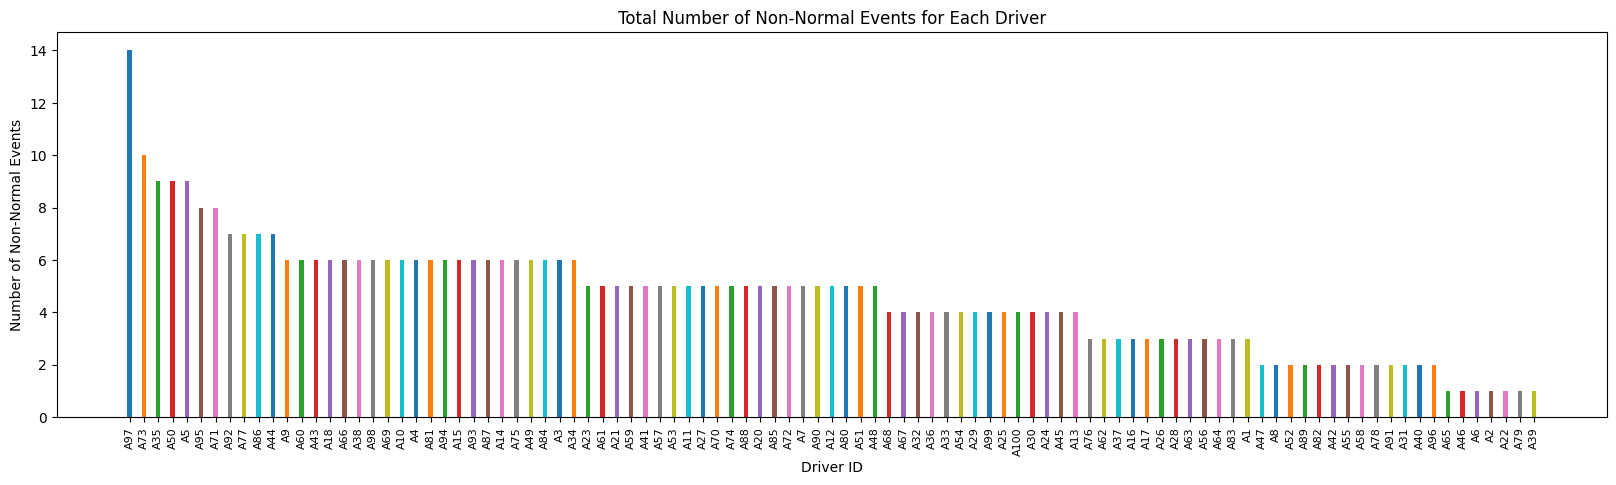

In [0]:
events_summary_query = """
SELECT driverid, COUNT(*) AS count
FROM geolocation
WHERE event_ind != 0
GROUP BY driverid
ORDER BY count DESC
"""

events_summary = spark.sql(events_summary_query)
display(events_summary)
events_summary_pd = events_summary.toPandas()
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))
bars = plt.bar(events_summary_pd['driverid'], events_summary_pd['count'], width=0.3, color=[colors[i % len(colors)] for i in range(len(events_summary_pd['driverid']))])
plt.xlabel('Driver ID')
plt.xlabel('Driver ID')
plt.ylabel('Number of Non-Normal Events')
plt.title('Total Number of Non-Normal Events for Each Driver')
plt.xticks(rotation=90,fontsize=8)
# plt.subplots_adjust(bottom=1)
# plt.ylim(5.0,15.0)
plt.show()

city,count
Santa Rosa,1072
Willits,529
Stockton,315
Antelope,315
Apple Valley,315


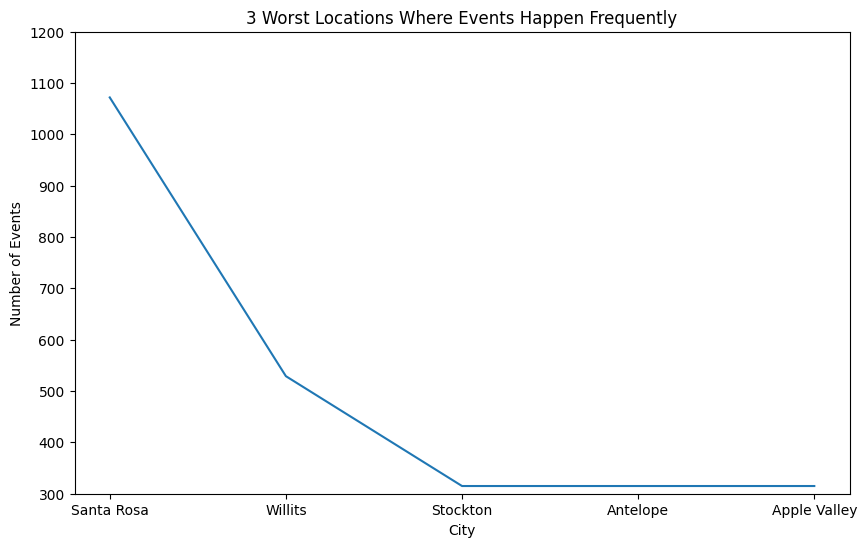

In [0]:
location_summary_query = """
SELECT city, COUNT(*) AS count
FROM geolocation
GROUP BY city
ORDER BY count DESC
LIMIT 5
"""

worst_locations = spark.sql(location_summary_query)
display(worst_locations)
worst_locations_pd = worst_locations.toPandas()

plt.figure(figsize=(10, 6))
plt.plot(worst_locations_pd['city'], worst_locations_pd['count'])
plt.xlabel('City')
plt.ylabel('Number of Events')
plt.title('3 Worst Locations Where Events Happen Frequently')
plt.ylim(300,1200)
plt.show()

driverid,risk_factor
A97,22.180009790890036
A73,15.57093964392375
A35,14.127198152790356
A50,14.060984050157092
A5,13.30231430708245
A95,12.44322777328439
A71,11.904301321675055
A92,11.325962828189999
A86,11.11891199857678
A44,10.726341903680515


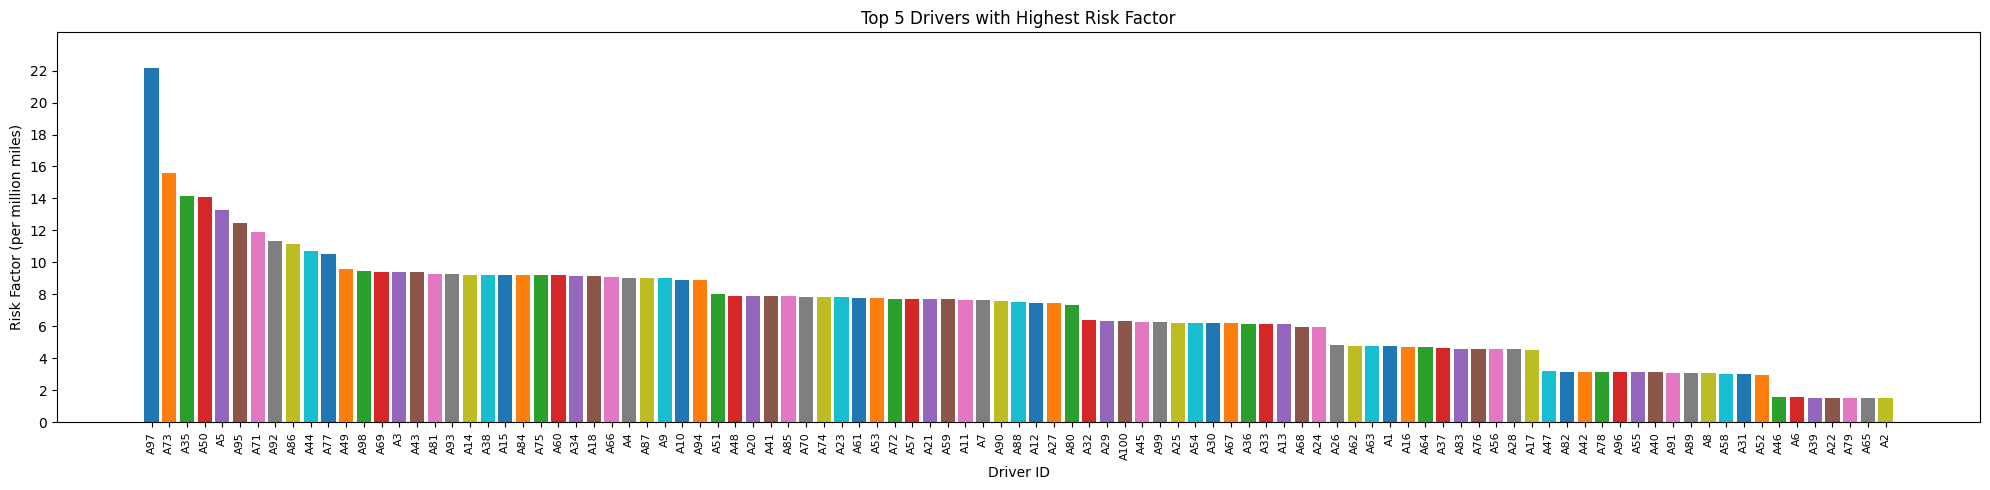

In [0]:
risk_factor_query = """
WITH driver_events AS (
  SELECT driverid, COUNT(*) AS event_count
  FROM geolocation
  WHERE event_ind != 0
  GROUP BY driverid
),
driver_miles AS (
  SELECT driverid,
         SUM(jun13_miles + may13_miles + apr13_miles + mar13_miles + feb13_miles + jan13_miles +
             dec12_miles + nov12_miles + oct12_miles + sep12_miles + aug12_miles + jul12_miles +
             jun12_miles + may12_miles + apr12_miles + mar12_miles + feb12_miles + jan12_miles +
             dec11_miles + nov11_miles + oct11_miles + sep11_miles + aug11_miles + jul11_miles +
             jun11_miles + may11_miles + apr11_miles + mar11_miles + feb11_miles + jan11_miles +
             dec10_miles + nov10_miles + oct10_miles + sep10_miles + aug10_miles + jul10_miles +
             jun10_miles + may10_miles + apr10_miles + mar10_miles + feb10_miles + jan10_miles +
             dec09_miles + nov09_miles + oct09_miles + sep09_miles + aug09_miles + jul09_miles +
             jun09_miles + may09_miles + apr09_miles + mar09_miles + feb09_miles + jan09_miles) AS total_miles
  FROM trucks
  GROUP BY driverid
)
SELECT e.driverid, (CAST(event_count AS FLOAT) / total_miles) * 1000000 AS risk_factor
FROM driver_events e
JOIN driver_miles m ON e.driverid = m.driverid
ORDER BY risk_factor DESC
"""

risk_factor = spark.sql(risk_factor_query)
display(risk_factor)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Plotting the results
risk_factor_pd = risk_factor.toPandas()
plt.figure(figsize=(20, 5))
plt.bar(risk_factor_pd['driverid'], risk_factor_pd['risk_factor'], color=[colors[i % len(colors)] for i in range(len(events_summary_pd['driverid']))])
plt.xlabel('Driver ID')
plt.ylabel('Risk Factor (per million miles)')
plt.title('Top 5 Drivers with Highest Risk Factor')
plt.xticks(rotation=90,fontsize=8)
# Adjust y-axis scale and granularity
plt.ylim(0, max(risk_factor_pd['risk_factor']) * 1.1)  # Extend y-axis to be 10% higher than max value
plt.yticks(range(0, int(max(risk_factor_pd['risk_factor']) + 1), int(max(risk_factor_pd['risk_factor']) / 10)))  # Adjust granularity based on the range of data

plt.tight_layout()
plt.show()


+--------+------------------+------------------+
|driverid|       risk_factor|        prediction|
+--------+------------------+------------------+
|      A9| 9.016373734702219| 9.025918686262106|
|     A21| 7.700280444213778| 7.630723128142498|
|     A43| 9.371588156186888| 9.025918686262106|
|     A53|7.7594086709840004| 7.630723128142498|
|     A82|3.1659495790870036| 3.445136453783678|
|     A42|3.1522770473251356| 3.445136453783678|
|     A25| 6.198139008762619| 6.235527570022891|
|     A69| 9.417333858611288| 9.025918686262106|
|     A79|1.5265008174411878| 2.049940895664071|
|     A88| 7.518559564284436| 7.630723128142498|
|     A63| 4.787865633338866| 4.840332011903285|
|     A40|3.1098105192450625| 3.445136453783678|
|     A94| 8.865903213889915| 9.025918686262106|
|     A14| 9.235813405783158| 9.025918686262106|
|     A97|22.180009790890036|20.187483151218963|
|      A5| 13.30231430708245|13.211505360620926|
|     A39|1.5327620218357279| 2.049940895664071|
|     A51| 8.0287235

driverid,risk_factor,prediction
A9,9.016373734702219,9.025918686262106
A16,4.701560604683381,4.840332011903285
A59,7.680644928393348,7.630723128142498
A11,7.663398993335908,7.630723128142498
A89,3.0649931803901738,3.445136453783678
A42,3.1522770473251356,3.445136453783678
A25,6.198139008762619,6.235527570022891
A69,9.417333858611288,9.025918686262106
A79,1.5265008174411878,2.049940895664071
A88,7.518559564284436,7.630723128142498


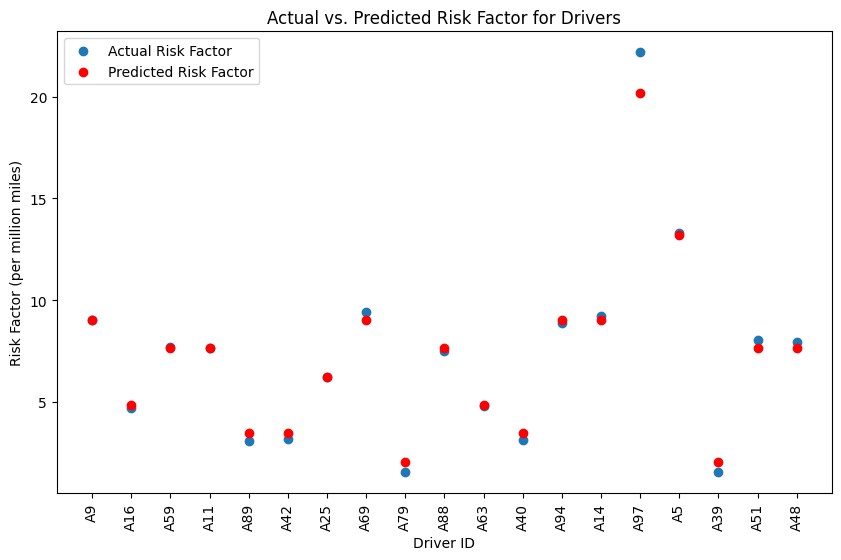

In [0]:
# Calculate total miles for each driver
spark.sql("""
CREATE OR REPLACE TEMPORARY VIEW driver_miles AS
SELECT driverid,
       SUM(jun13_miles + may13_miles + apr13_miles + mar13_miles + feb13_miles + jan13_miles +
           dec12_miles + nov12_miles + oct12_miles + sep12_miles + aug12_miles + jul12_miles +
           jun12_miles + may12_miles + apr12_miles + mar12_miles + feb12_miles + jan12_miles +
           dec11_miles + nov11_miles + oct11_miles + sep11_miles + aug11_miles + jul11_miles +
           jun11_miles + may11_miles + apr11_miles + mar11_miles + feb11_miles + jan11_miles +
           dec10_miles + nov10_miles + oct10_miles + sep10_miles + aug10_miles + jul10_miles +
           jun10_miles + may10_miles + apr10_miles + mar10_miles + feb10_miles + jan10_miles +
           dec09_miles + nov09_miles + oct09_miles + sep09_miles + aug09_miles + jul09_miles +
           jun09_miles + may09_miles + apr09_miles + mar09_miles + feb09_miles + jan09_miles) AS total_miles
FROM trucks
GROUP BY driverid
""")

# Calculate number of events for each driver
spark.sql("""
CREATE OR REPLACE TEMPORARY VIEW driver_events AS
SELECT driverid, COUNT(*) AS event_count
FROM geolocation
WHERE event_ind != 0
GROUP BY driverid
""")

# Join driver miles and events data
spark.sql("""
CREATE OR REPLACE TEMPORARY VIEW driver_data AS
SELECT m.driverid, m.total_miles, e.event_count, (CAST(e.event_count AS FLOAT) / NULLIF(m.total_miles, 0)) * 1000000 AS risk_factor
FROM driver_miles m
LEFT JOIN driver_events e ON m.driverid = e.driverid
""")

# Remove rows with null or NaN values in risk_factor
spark.sql("""
CREATE OR REPLACE TEMPORARY VIEW driver_data_cleaned AS
SELECT *
FROM driver_data
WHERE risk_factor IS NOT NULL AND risk_factor != 'NaN'
""")

# Split data into training and testing sets
spark.sql("""
CREATE OR REPLACE TEMPORARY VIEW driver_data_with_rand AS
SELECT *, rand() as split_rand FROM driver_data_cleaned
""")

spark.sql("""
CREATE OR REPLACE TEMPORARY VIEW training_data AS
SELECT * FROM driver_data_with_rand WHERE split_rand < 0.8
""")

spark.sql("""
CREATE OR REPLACE TEMPORARY VIEW test_data AS
SELECT * FROM driver_data_with_rand WHERE split_rand >= 0.8
""")

# Train linear regression model
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(featuresCol="features", labelCol="risk_factor", maxIter=10, regParam=0.3, elasticNetParam=0.8)
assembler = VectorAssembler(inputCols=["total_miles", "event_count"], outputCol="features", handleInvalid="keep")

training_data = assembler.transform(spark.table("training_data"))
lrModel = lr.fit(training_data)

# Make predictions on test data
test_data = assembler.transform(spark.table("test_data"))
predictions = lrModel.transform(test_data)
predictions.select("driverid", "risk_factor", "prediction").show()

result_df = predictions.select("driverid", "risk_factor", "prediction").toPandas()
display(result_df)
# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(result_df["driverid"], result_df["risk_factor"], label="Actual Risk Factor")
plt.scatter(result_df["driverid"], result_df["prediction"], label="Predicted Risk Factor", color="r")
plt.legend()
plt.xlabel("Driver ID")
plt.ylabel("Risk Factor (per million miles)")
plt.title("Actual vs. Predicted Risk Factor for Drivers")
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()